# Linear algebra

#### Third practical work, Monday,  October 12, 19 and 26, 2020
This third practical work covers the basics of linear algebra. We will see how to efficiently solve a large set of equation numerically and how to compute the normal frequencies of a vibrating system. 

As usual, first run the following cell to import the librairies used in this Notebook. If you get an error message, it's probably because the memory profiler is not installed. In that case, run in a terminal `pip3 install memory_profiler` (if it fails, comment the last line in the cell below)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sps
from scipy.sparse.linalg import eigsh, eigs, bicg, factorized
from scipy.sparse.linalg.dsolve import linsolve
import random as rand
#%load_ext memory_profiler

### Exercise 1: solving a set of equations


Consider the following set of equations,

$$ 3x + 4y = -5,$$
$$ 2x - y  =4.$$

To obtain the solution x=1 and y=-2 numerically, it has to be recast under the form of a linear matrix equation MX = B, with

$$ M =  \begin{pmatrix} 3 & 4 \\2 & -1 \end{pmatrix}, ~~~ X = \begin{pmatrix} x \\ y \end{pmatrix}, ~~~ B = \begin{pmatrix} -5 \\ 4 \end{pmatrix}. $$

Once M and B are defined, only a single additional line of code is needed to get X. 

1. Create M and B for this example with the function `np.array` and print them
2. Compute X with [the direct *NumPy* solver](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) `np.linalg.solve` and print it


In [6]:
#Q1
B = np.array([-5, 4])
M = np.array([[3, 4],[2, -1]])
print("We just defined a vector B =", B, "and a matrix M =\n", M)

# Q2
X = np.linalg.solve(M, B)
print("The solution is x =", X[0], "and y =", X[1])

We just defined a vector B = [-5  4] and a matrix M =
 [[ 3  4]
 [ 2 -1]]
The solution is x = 1.0 and y = -2.0


### Exercise 2: a first application in mechanics

We want to find the equilibrium positions of the two point-like particles sketched below.
<img src="add_files/TP3_1.png"  width="400" height="400" />


1. Correct the equations in the Markdown cell below to get the right set of equations to solve
2. Define the 2D array Q and the 1D array F with k=2.45, k'=1.43 and ℓ=0.12. You should find
$$Q =  \begin{pmatrix} 3.88 & -1.43 \\ -1.43 & 3.88 \end{pmatrix}, ~~~~ F = \begin{pmatrix} -0.0492 \\ 0.9312 \end{pmatrix}. $$
3. Use the direct NumPy solver `np.linalg.solve` to compute `X` 
4. Create a function `equi_pos(k,kp,l)` that returns the distance `D` between the two particles at equilibrium
5. Plot `D` as a function of `k` in the range 0.01 to 30 for fixed values of k'=1.43 and ℓ=0.12
6. Add to this plot the two theoretical asymptotes
\begin{align}
D &\simeq 2\ell \left( 1- \frac{k}{4k'} \right)&(k \ll k')\\
D &\simeq \ell \left( 1+ \frac{2k'}{k} \right)&(k \gg k')
\end{align}

**Correction**

On réalise un bilan des forces exercées sur la particule A :

* Le ressort lié au mur exerce sur A une force $\mathbf{F}_{A1} = -k (x_A-\ell) ~\mathbf{e}_x $
* Le ressort lié à B exerce sur A une force $\mathbf{F}_{A2} = k' (x_B-x_A-2\ell) ~\mathbf{e}_x $
* La position d'équilibre de A est donc déduite d'un équilibre de ces forces, 
$$ \mathbf{F}_{A1}+\mathbf{F}_{A2} = \mathbf{0} \longrightarrow (k+k') x_A - k' x_B = \ell (k-2k')$$

On réalise un bilan des forces exercées sur la particule B :
* Le ressort lié au mur exerce sur B une force $\mathbf{F}_{B1} = -k (x_B - 2\ell) ~\mathbf{e}_x $
* Le ressort lié à A exerce sur B une force $\mathbf{F}_{B2} = k' (x_A+2\ell-x_B) ~\mathbf{e}_x $
* La position d'équilibre de B est donc déduite d'un équilibre de ces forces, 
$$ \mathbf{F}_{B1}+\mathbf{F}_{B2} = \mathbf{0} \longrightarrow -k' x_A + (k+k') x_B = 2 \ell (k+k')$$

Ces deux équations d'équilibre peuvent se mettre sous forme vectorielle,

$$QX = F,~~~~~~~ Q =  \begin{pmatrix} k+k' & -k' \\ -k' & k+k' \end{pmatrix}, ~~~ X = \begin{pmatrix} x_A \\ x_B \end{pmatrix}, ~~~ F = \begin{pmatrix} (k-2k')\ell \\ 2(k+k')\ell \end{pmatrix}. $$

[[ 3.88 -1.43]
 [-1.43  3.88]] [-0.0492  0.9312]
The two particles must lie between 0 and 3l= 0.36
Their equilibrium positions are x_a = 0.08768361581920904 and x_b = 0.27231638418079096


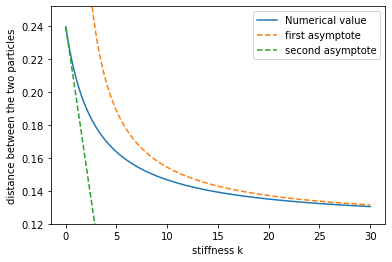

In [2]:
#Q2
k  = 2.45
kp = 1.43
l  = 0.12
F  = np.array([(k - 2 * kp) * l, 2 * (k + kp) * l])
Q  = np.array([[k + kp, -kp], [-kp, k + kp]])

print(Q, F)

#Q3
X = np.linalg.solve(Q, F)
print("The two particles must lie between 0 and 3l=", 3 * l)
print("Their equilibrium positions are x_a =", X[0], "and x_b =", X[1])

#Q4
def equi_pos(k, kp, l):
    F = np.array([(k - 2 * kp) * l, 2 * (k + kp) * l])
    Q = np.array([[k + kp, -kp], [-kp, k + kp]])
    X = np.linalg.solve(Q, F)
    return X[1] - X[0]


#Q5+6
N = 100
kmin = .01
kmax = 30
k_list = np.linspace(kmin, kmax, N)
D_list = np.empty(N)
asymp_1 = np.empty(N)
asymp_2 = np.empty(N)
for i in range(N):
    D_list[i] = equi_pos(k_list[i], kp, l)
    asymp_1[i] = l * (1 + 2 * kp / k_list[i])
    asymp_2[i] = 2 * l * (1 - .25 * k_list[i] / kp)
plt.plot(k_list, D_list, label='Numerical value')
plt.plot(k_list, asymp_1, '--', label='first asymptote')
plt.plot(k_list, asymp_2, '--', label='second asymptote')
plt.ylim([l, 2.1 * l])
plt.legend()
plt.xlabel('stiffness k')
plt.ylabel('distance between the two particles')
plt.show()

### Exercise 3: stiffness of several springs in series

We consider five point-like particles connected by springs of rest length ℓ and stiffness k=4, an external force F being applied at the very end of the chain.

<img src="add_files/TP3_2.png"  width="500" height="500" />

Denoting the position of the n<sup>th</sup> particle by x<sub>n</sub>=(n+1) ℓ + ξ<sub>n</sub>, the equilibrium deformations ξ<sub>n</sub> are given by 

\begin{align}
-2k \xi_0 + k \xi_1 &= 0\\
k\xi_0  - 2k \xi_1 + k \xi_2 &= 0\\
k\xi_1  - 2k \xi_2 + k \xi_3 &= 0\\
k\xi_2  - 2k \xi_3 + k \xi_4 &= 0\\
k\xi_3 - k \xi_4  &= -F\\
\end{align}

1. For a given force F = 0.1, compute the equilibrium deformations
2. For several values of F between zero and 0.5, plot F as a function of the total extension ξ<sub>4</sub>. What is the equivalent stiffness of this system? Compare your value to the theoretical one (k/5).


The problem is of the form QX=B, with B= [ 0.   0.   0.   0.  -0.1] and Q=
 [[-8.  4.  0.  0.  0.]
 [ 4. -8.  4.  0.  0.]
 [ 0.  4. -8.  4.  0.]
 [ 0.  0.  4. -8.  4.]
 [ 0.  0.  0.  4. -4.]]


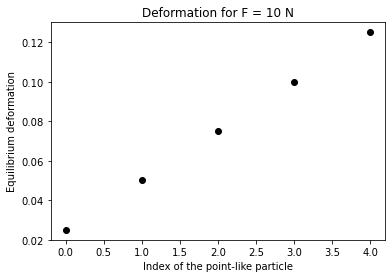

In [8]:
# Q1
(F, k, N) = (0.1, 4, 5)  # N = number of springs

B = np.zeros(N)
B[N - 1] = -F

Q = -2 * k * np.eye(N) + k * np.eye(N, k=1) + k * np.eye(N, k=-1)
Q[N - 1, N - 1] = -k

print("The problem is of the form QX=B, with B=", B, "and Q=\n", Q)
X = np.linalg.solve(Q, B)

plt.plot(X, 'ok')
plt.xlabel("Index of the point-like particle")
plt.ylabel("Equilibrium deformation")
plt.title("Deformation for F = 10 N")
plt.show()

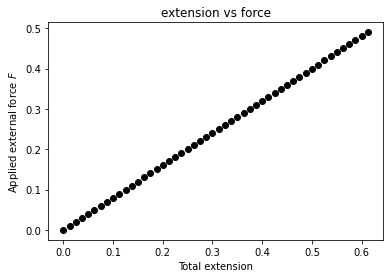

This system is equivalent to a single spring of stiffness 0.7999999999999998 (th value: 0.8 )


In [9]:
# Q2
N_step = 50
F_list, El_list = np.empty(N_step), np.empty(N_step)

for i in range(N_step):
    F_list[i] = i * 1e-2
    B[N - 1] = -F_list[i]
    El_list[i] = np.linalg.solve(Q, B)[N - 1]

plt.plot(El_list, F_list, 'ok')
plt.ylabel("Applied external force $F$")
plt.xlabel("Total extension")
plt.title("extension vs force")
plt.show()

k_th = k / 5 
print("This system is equivalent to a single spring of stiffness",
      F_list[1] / El_list[1], "(th value:", k_th, ")")

### Exercise 4: solving very large sets of equations

It is common in mechanics to solve *very* large sets of equations, for instance to compute the deformations of a body subjected to external forces or the time evolution of a flow in fluid mechanics. In such cases, the careless use of a direct solver can become very slow and inefficient. Fortunately, these sets of equations are usually such that the coefficient matrix is sparse, which results from the neglect of long-range interactions. This provides a way to drastically improve the efficiency of a numerical solver.

To evidence this fact, we consider the elongation due to its own weight of a bar of mass M and length L, modeled as N point-like particles of mass m=M/N connected by springs. The springs are of rest length ℓ = L/N and stiffness k=NK (K is a constant), as sketched below for N=5.

<img src="add_files/TP3_3.png"  width="300" height="300" />


1. For N=5, compute theoretically the mass and stiffness matrices (M,K) of this system and the external force F such that the dynamics reads $ M \ddot{X} + K X = F$, with

$$X(t) = \begin{pmatrix}\xi_0(t) \\ \xi_1(t) \\ \xi_2(t) \\ \xi_3(t) \\ \xi_4(t) \end{pmatrix}$$

2. Show that the equilibrium deformations can then be found with 

$$ QX = B, ~~~~~~~~~~~Q = \begin{pmatrix} 2 & -1 & 0 & 0 & 0  \\ -1 & 2 & -1 & 0 & 0 \\ 0 & -1 & 2 & -1 & 0 \\ 0 & 0 & -1 & 2 & -1 \\ 0 & 0 & 0 & -1 & 1 \end{pmatrix}, ~~~ B = C \begin{pmatrix}1 \\ 1 \\ 1 \\ 1 \\ 1 \end{pmatrix}, ~~~~~ C=\frac{mg}{k} $$

   We thereafter assume that C =N<sup>-2</sup>. It is clear that Q is sparse, which will prove to be useful. We define below several functions to solve this problem numerically and compare their efficiency.

3. Define Q as a dense matrix with the function [`np.eye`](https://numpy.org/doc/stable/reference/generated/numpy.eye.html) for any N, then check your code by printing Q for N=5.

4. Write a function `inv_densemat(N, C)` that generates the dense matrix Q, inverses it then returns X = Q<sup>-1</sup>B

   *(Hint: you may use `np.linalg.inv`. Note also that the matrix multiplication of M by N is* `M@N` *and* **not**  `M*N` *that would multiply these two arrays element by element)*
   
5. Write `dsolve_densemat(N, C)` that creates the dense matrix Q, computes X with the direct solver `np.linalg.solve` and returns X

Python's *SciPy* library handles sparse matrices. There are several different types of sparse matrices, each one of them being efficient for specific operations: for this tutorial, just replace `np.eye` by `sps.eye`.

6. Write a function `dsolve_sparsemat(N, C)` that defines Q as a sparse matrix, then computes X with the sparse solver `linsolve.spsolve` and returns X

Iterative solvers can be used instead of direct solvers and have, in fact, many advantages (especially when dealing with large and/or dense matrices):
- large dense matrices required for direct solvers cannot be stored in memory
- iterative solvers are usually faster than direct solvers, and can handle nonlinear equations
- if only an estimate is being sought, it is possible to perform a few iterations and stop
- they can take advantage of a good initial guess, when available

[Many iterative solvers exist for sparse matrices in *SciPy*.](https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html) To wit, they either correct the solution at each iteration based on the residual (e.g. the Gauss-Sneidel solver) or perform many multiplications by M and orthogonalizations. Here, we only consider the so-called *biconjugate gradient method* ```bicg```.

7. Write a function `itsolve_sparsemat(N, C)` that defines Q as a sparse matrix, computes X [with the bicg iterative solver](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.bicg.html?highlight=bicg) and returns X 
8. For N=1000, check that these solvers yield the same result by plotting the four vectors X they return on a single graph. Plot also the analytical asymptotic solution in the limit of large N,

$$ \xi_n \underset{N \rightarrow \infty}{=} \frac{n}{N} - \frac{1}{2} \left( \frac{n}{N}\right)^2.$$

9. The CPU time and memory usage of 

    In a Markdown cell, write down θn+1 and Ωn+1 as a fun

    In a Markdown cell, write down θn+1 and Ωn+1 as a funthese processes strongly differ. These quantities can be measured with ```%timeit``` and ```%memit```. Compare the various solvers with N=1000 (*it may take up to five minutes to run depending on your computer*).

**Correction**

Q1.Denoting the position of the n<sup>th</sup> particle by z<sub>n</sub>=(n+1) ℓ + ξ<sub>n</sub>, the deformations ξ<sub>n</sub> are given by 

$$M \ddot{X} + K X = F,~~~~~~~~~~~~~~ M = m \begin{pmatrix} 1 & 0 & 0 & 0 & 0  \\ 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 1 \end{pmatrix}, ~~ K = k \begin{pmatrix}  2 & -1 & 0 & 0 & 0  \\ -1 & 2 & -1 & 0 & 0 \\ 0 & -1 & 2 & -1 & 0 \\ 0 & 0 & -1 & 2 & -1 \\ 0 & 0 & 0 & -1 & 1  \end{pmatrix}, ~~F = mg \begin{pmatrix}1 \\ 1 \\ 1 \\ 1 \\ 1 \end{pmatrix}$$

Q2. The equilibrium deformations can therefore be found with

$$ QX = B, ~~~~~~~~~~~Q = \begin{pmatrix} 2 & -1 & 0 & 0 & 0  \\ -1 & 2 & -1 & 0 & 0 \\ 0 & -1 & 2 & -1 & 0 \\ 0 & 0 & -1 & 2 & -1 \\ 0 & 0 & 0 & -1 & 1 \end{pmatrix}, ~~~ B = \frac{mg}{k} \begin{pmatrix}1 \\ 1 \\ 1 \\ 1 \\ 1 \end{pmatrix}$$

and we thereafter assume that mg/k =N<sup>-2</sup>. It is clear that Q is sparse, and that will be useful. We define below several functions to solve this problem numerically and compare their efficiency.


In [15]:
#Q3
N=5
Q = 2*np.eye(N) - np.eye(N, k=-1) - np.eye(N, k=1)
Q[N-1, N-1] = 1
print(Q)

[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  1.]]


In [16]:
#Q4 
def inv_densemat(N, C):
    # k is the index of the diagonal
    Q = 2*np.eye(N) - np.eye(N, k=-1) - np.eye(N, k=1)
    Q[N-1, N-1] = 1
    B = C*np.ones(N)
    return np.linalg.inv(Q)@B

In [17]:
#Q5
def dsolve_densemat(N, C):
    Q = 2*np.eye(N) - np.eye(N, k=-1) - np.eye(N, k=1)
    Q[N-1, N-1] = 1
    B = C*np.ones(N)
    return np.linalg.solve(Q, B)

In [5]:
#Q6
def dsolve_sparsemat(N, C):
    Q = 2*sps.eye(N) - sps.eye(N, k=-1) - sps.eye(N, k=1)
    Q[N-1, N-1] = 1
    B = C*np.ones(N)
    return linsolve.spsolve(Q, B)

In [3]:
#Q7
def itsolve_sparsemat(N, C):
    Q = 2*sps.eye(N) - sps.eye(N, k=-1) - sps.eye(N, k=1)
    Q[N-1, N-1] = 1
    B = C*np.ones(N)
    X, in  fo = bicg(Q, B)
    if info != 0:
        print(info)
    return X

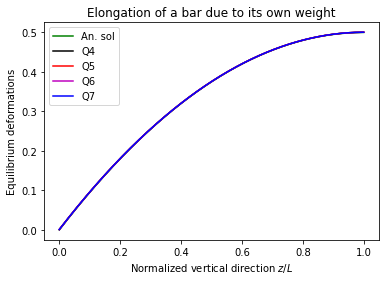

In [20]:
N = 1000
C = 1/N**2
X = np.linspace(0, 1, N)

plt.plot(X, X-.5*X**2, '-g', label='An. sol')
plt.plot(X, inv_densemat(N, C), '-k', label='Q4')
plt.plot(X, dsolve_densemat(N, C), '-r', label='Q5')
plt.plot(X, dsolve_sparsemat(N, C), '-m', label='Q6')
plt.plot(X, itsolve_sparsemat(N, C), '-b', label='Q7')

plt.xlabel("Normalized vertical direction $z/L$")
plt.ylabel("Equilibrium deformations")
plt.title("Elongation of a bar due to its own weight")
plt.legend()
plt.show()

In [12]:
N = 5000
C = 1/N**2

print("Option 1: create a dense matrix and inverse it")
%timeit inv_densemat(N, C)
%memit inv_densemat(N, C)

print("\nOption 2: create a dense matrix and use a direct solver")
%timeit dsolve_densemat(N, C)
%memit dsolve_densemat(N, C)

print("\nOption 3: create a sparse matrix and use a direct solver")
%timeit dsolve_sparsemat(N, C)
%memit dsolve_sparsemat(N, C)

print("\nOption 4: create a sparse matrix and use an iterative solver")
%timeit itsolve_sparsemat(N, C)
%memit itsolve_sparsemat(N, C)

Option 1: create a dense matrix and inverse it
2.6 s ± 44.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
peak memory: 849.18 MiB, increment: 711.10 MiB

Option 2: create a dense matrix and use a direct solver
768 ms ± 2.83 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
peak memory: 520.17 MiB, increment: 381.32 MiB

Option 3: create a sparse matrix and use a direct solver
2.03 ms ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
peak memory: 139.24 MiB, increment: -0.09 MiB

Option 4: create a sparse matrix and use an iterative solver
1 ms ± 2.02 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
peak memory: 139.24 MiB, increment: 0.00 MiB


### Interlude on matrix factorization

Matrix decomposition methods (also known as factorization methods) are used to implement efficient algorithms. At least three of them are commonly used in scientific computing: 

- The pivoted lower-upper (LU) decomposition, very useful to solve MX = B for a lot of different B's.
- The eigendecomposition of real symmetric matrices
- The singular value decomposition (SVD), a generalization in some sense of 2. used to extract information from datasets, to understand the main underlying processes and to get an accurate approximate of a matrix with limited storage space.

#### The pivoted LU decomposition

Every nonsingular square matrix M is the product of three special matrices, 

$$M=PLU$$

where P is a permutation matrix, L lower triangular with unit diagonal elements, and U upper triangular. The computation of such a decomposition requires a large number of operations, but once it is done we can solve hundreds of systems of equations of the form MX=B at a much cheaper cost. For instance, consider the following set of equations,

\begin{align}
2x+y-z &= 1,\\
x-2y+3z &= 1,\\
2x+3y+z &= 1.\\
\end{align}

It is of the form MX = B, with

$$ M =  \begin{pmatrix} 2 & 1 & -1 \\ 1 & -2 & 3 \\ 2 & 3 & 1 \end{pmatrix}=  \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix} \times \begin{pmatrix} 1 & 0 & 0 \\ .5 & 1 & 0 \\ 1 & -.8 & 1 \end{pmatrix} \times   \begin{pmatrix} 2 & 1 & -1 \\ 0 & -2.5 & 3.5 \\ 0 & 0 & 4.8 \end{pmatrix}, ~~~ X = \begin{pmatrix} x \\ y\\z \end{pmatrix}, ~~~ B = \begin{pmatrix} 1 \\ 1\\1 \end{pmatrix}. $$

In this case, P is the identity matrix. To compute X, we perform two substitutions instead of Gaussian elimination:

1. Define $\tilde{X}=UX$ such that $LUX=B$ reduces to $L \tilde{X} = B$ and solve for $\tilde{X}$, 

\begin{align}
\tilde{x} &= 1,\\
.5 \tilde{x}+ \tilde{y} &= 1,\\
\tilde{x} - .8\tilde{y} +\tilde{z}&= 1,\\
&\Rightarrow \tilde{x}=1, \tilde{y}=.5, \tilde{z}=.4.
\end{align}

2. Solve $UX = \tilde{X}$ for $X$, 

\begin{align}
4.8 z = \tilde{z}&=.4\\
-2.5 y + 3.5 z = \tilde{y}&=.5\\
2x+y-z = \tilde{x}&=1\\
&\Rightarrow x\simeq.6, y\simeq -.08, z\simeq.08.
\end{align}

### Exercise 5: LU decomposition for sparse matrices

We reconsider the system introduced before and sketched below.

<img src="add_files/TP3_3.png"  width="300" height="300" />

Recall that the equilibrium deformations ξ<sub>n</sub> are given by 
\begin{align}
2\xi_0 - \xi_1 &= C\\
- \xi_{n+1} + 2 \xi_n - \xi_{n-1} &= C&n \in [1,N-2]\\
\xi_{N-1} - \xi_{N-2} &= C
\end{align}

with C=mg/k. Thereafter, we set m=N<sup>-1</sup>, g=10 and k=10N such that C=N<sup>-2</sup>. The code you wrote to answer Q6 of exercise 4 defines Q as a sparse matrix, B as an array and solves for X with a direct solver (the fastest option for the values of N considered below). We now want to compute the total elongation of the bar ξ<sub>N-1</sub> when an additionnal mass m'=10 is attached depending on its attachment point, e.g., for N=5, the total elongation of the five following bars

<img src="add_files/TP3_4.png"  width="500" height="500" />


1. Create a function ```elong_plot_dir(N)``` that returns the total elongation as a function of the index i of the point-like particle the mass m' is attached to (i ranges from 0 to N-1) using a direct solver.
2. Create a function ```elong_plot_LU(N)``` that returns the total elongation as a function of i using a LU decomposition of Q ([have a look at the *SciPy* linear algebra reference guide](https://docs.scipy.org/doc/scipy-0.14.0/reference/sparse.linalg.html)).
3. Compare the speed of these two options with ```%timeit``` for N=10,100,1000.

In [6]:
# Q1
def elong_plot_dir(N):

    m, g, k, mp = 1 / N, 10, 10 * N, 10
    Q = 2 * sps.eye(N) - sps.eye(N, k=-1) - sps.eye(N, k=1)
    Q[N - 1, N - 1] = 1
    el_list = np.empty(N)
    for i in range(N):
        B = (m * g / k) * np.ones(N)
        B[i] += mp * g / k
        el_list[i] = linsolve.spsolve(Q, B)[N - 1]
    return el_list

In [7]:
elong_plot_dir(5)

array([ 2.6,  4.6,  6.6,  8.6, 10.6])

In [8]:
# Q2
def elong_plot_LU(N):

    m, g, k, mp = 1/N, 10, 10*N, 10
    Q = 2*sps.eye(N) - sps.eye(N, k=-1) - sps.eye(N, k=1)
    Q[N-1, N-1] = 1
    solve = factorized(Q)  # Makes LU decomposition.
    el_list = np.empty(N)
    for i in range(N):
        B = (m*g/k)*np.ones(N)
        B[i] += mp*g/k
        el_list[i] = solve(B)[N-1]
    return el_list

In [10]:
# Q3
for N in [10, 100, 1000]:
    print("\nDirect solver, N =", N)
    %timeit elong_plot_dir(N)
    print("LU decomposition, N =", N)
    %timeit elong_plot_LU(N)


Direct solver, N = 10
720 µs ± 9.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
LU decomposition, N = 10
563 µs ± 7.95 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

Direct solver, N = 100
4.75 ms ± 10.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
LU decomposition, N = 100
1.23 ms ± 5.22 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

Direct solver, N = 1000
210 ms ± 303 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
LU decomposition, N = 1000
21.1 ms ± 92.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Exercise 6:  eigenvalues and eigenvectors

Another typical class of problems in mechanics consists in computing the eigenmodes and eigenfrequencies of a vibrating structure, i.e., in carrying out a modal analysis. This can be done both experimentally (e.g., on real small scale airplanes) and/or numerically. Although we intend to compute the eigenmodes of systems with hundreds of more degrees of freedom, the following example sketches the method with only two point-like particles of mass m connected by springs.


<img src="add_files/TP3_5.png"  width="350" height="350" />

The dynamics is given by the following two ordinary differential equations, 

\begin{align}
m \ddot{x}_A &= - k_1 (x_A-\ell) + k_2 (x_B-x_A-\ell),\\
m \ddot{x}_B &= - k_1 (x_B-2\ell) + k_2 (x_A-x_B+\ell).\\
\end{align}

and therefore reads 

$$M \ddot{X} + K X = F,~~~~~~~~~~~~~~ M = m \begin{pmatrix} 1 & 0  \\ 0 & 1 \end{pmatrix}, ~~ K = \begin{pmatrix}  k_1+k_2 & -k_2 \\ -k_2 & k_1+k_2  \end{pmatrix}, ~~F = \begin{pmatrix}(k_1-k_2)\ell \\ (2k_1+k_2)\ell \end{pmatrix}, ~~ X(t) = \begin{pmatrix} x_A(t) \\ x_B(t) \end{pmatrix} $$

we first find the equilibrium position, 

$$X_\mathrm{eq} = \begin{pmatrix} \ell  \\ 2\ell \end{pmatrix}, $$

then define 

$$X(t) = X_\mathrm{eq} + \mathrm{Re} \left(\delta X e^{i\omega t}\right) \longrightarrow \delta X (\omega^2M-K)=0 \longleftrightarrow Q \delta X = \omega^2 \delta X, ~~~~~ Q = KM^{-1}=\frac{1}{m}\begin{pmatrix}  k_1+k_2 & -k_2 \\ -k_2 & k_1+k_2  \end{pmatrix} $$

One way to compute the natural frequencies is to set det(Mω<sup>2</sup>-K)=0, hence

$$\mathrm{det} \begin{pmatrix} m\omega^2-(k_1+k_2) & k_2  \\ k_2 & m\omega^2-(k_1+k_2) \end{pmatrix} = \left[m\omega^2 - k_1\right]\times \left[m \omega^2- k_1-2k_2 \right]=0,$$

then compute $\delta X$ for each solution of this equation. Another possibility is to recall that given a matrix Q, a non-zero vector X such that QX = λX is an eigenvector, and λ is the (possibly complex-valued) corresponding eigenvalue. Therefore, the natural frequencies are directly related to the eigenvalues of Q, and the structure of the normal modes to the eigenvectors of Q. Numerically, the function ```np.linalg.eig``` is used to compute both the eigenvalues and the eigenvectors (for sparse matrices, have a look at ```sp.linalg.eigs``` and ```sp.linalg.eigsh```).

1. For m=2.5, k<sub>1</sub>=2 and k<sub>2</sub>=3, generate the matrix Q then compute its eigenvalue and eigenvector. Check that the eigenvalues ω<sup>2</sup> match the theoretical prediction derive above. 

2. For an arbitrary amplitude of oscillation, plot the motion of both masses on a single graph for the first mode, then for the second mode. Which mode is the so-called *antisymmetric mode* ? and the *symetric mode* ?

In [3]:
#Q1
m, k1, k2, l = 2.5, 2., 3.,  1.
Q = 1/m*np.array([[k1+k2, -k2], [-k2, k1+k2]])

e_val, e_vec = np.linalg.eig(Q)

for i in range(len(e_val)):
    print("The", i, "th eigenvalue of M is",
          e_val[i], "and a corresponding eigenvector is", e_vec[:, i])
    
print("Theoretical squared angular frequencies are ", k1/m, " and ", (k1+2*k2)/m)

The 0 th eigenvalue of M is 3.2 and a corresponding eigenvector is [ 0.70710678 -0.70710678]
The 1 th eigenvalue of M is 0.8 and a corresponding eigenvector is [0.70710678 0.70710678]
Theoretical squared angular frequencies are  0.8  and  3.2


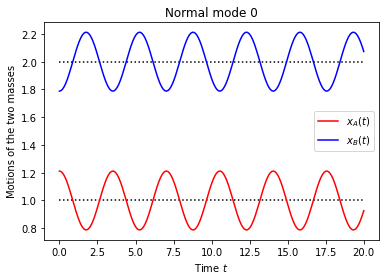

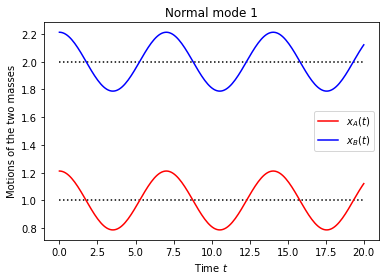

In [17]:
time_sample = np.linspace(0, 20, 200)
A = .3  # amplitude of the oscillations
for i in range(len(e_val)):
    w = np.sqrt(e_val[i])
    xa = l + A*e_vec[0, i]*np.cos(w*time_sample)
    xb = 2*l + A*e_vec[1, i]*np.cos(w*time_sample)

    plt.plot(time_sample, l*np.ones(len(time_sample)), ':k')
    plt.plot(time_sample, 2*l*np.ones(len(time_sample)), ':k')
    plt.plot(time_sample, xa, '-r', label='$x_A(t)$')
    plt.plot(time_sample, xb, '-b', label='$x_B(t)$')
    plt.ylabel("Motions of the two masses")
    plt.xlabel("Time $t$")
    plt.legend()
    plt.title("Normal mode " + str(i))
    plt.show()

### Third test: normal modes of a chain of coupled oscillators

Create a new Jupyter Notebook and save it as *firstname_lastname_TEST3.ipynb*. In this notebook, write a title and  answer the following questions.

**This .ipynb file will have to be uploaded on Moodle by Monday, October 26, 2020 at 10:30am**

**It will be rated out of 10 (this course unit being rated out of 100)**

We consider N identical particles of mass m on a line, with each particle bound to its neighbors by a spring of stiffness k and rest length ℓ. 

<img src="add_files/TP3_6.png"  width="450" height="450" />

We denote the position of the i<sup>th</sup> particle by x<sub>i</sub>=(n+1) ℓ + ξ<sub>i</sub> and assume periodic boundary conditions (x<sub>N</sub>=x<sub>0</sub>). The dynamics of the displacements is


\begin{align}
m \ddot{\xi}_0 &= k (\xi_1 - 2\xi_0 + \xi_{N-1}) \\
m \ddot{\xi}_i &= k (\xi_{i+1} - 2\xi_i + \xi_{i-1})&i \in [1, N-2] \\
m \ddot{\xi}_{N-1} &= k (\xi_{0} - 2\xi_{N-1} + \xi_{N-2})
\end{align}

1. Show that each normal mode obeys an equation of the form QX = ω<sup>2</sup>X, where ω is the natural (angular) frequency, and define Q as a dense matrix.

2. For N=10 and k=m=1, compute the normal modes and natural frequencies and sort them by eigenvalue (*Hint*: use ```np.argsort```)

3. Compare the natural frequencies to their theoretical values of

$$ \omega_n = \sqrt{\frac{4k}{m}} \left \vert \sin \left( \frac{n \pi}{N} \right) \right \vert $$

4. Plot the structure of the modes of lowest frequency (gravest mode) and of highest frequency.

We now turn to a large chain of oscillators and chose N=1000.

5. Plot all the natural frequencies on a single graph to evidence the fact that they span a full range between 0 and  ω<sub>max</sub> = 2.

6. We consider several ways of computing the ten modes of highest frequency. Using ```%timeit```, compare the execution times of :

    1. the *NumPy* eigenvalue solver ```np.linalg.eig```
    2. the *NumPy* eigenvalue solver for real symmetric matrices ```np.linalg.eigh```
    3. the *SciPy* eigenvalue solver for sparse real symmetric matrices ```sp.sparse.linalg.eigsh``` (use ω<sub>max</sub><sup>2</sup> as a guess).

This chain of N=1000 particles is now forced: an external force **<span>F**<sub>ext</sub>= Fcos(ωt)  **<span>e**<sub>x</sub> acts on the 501<sup>th</sup> particle *only* (denoted by x<sub>500</sub>)

7. Show that the steady-state solution of this problem is of the form Q'X = B.
8. Compute then plot this steady-state using sparse matrices for F=1 and two values of ω: one below ω<sub>max</sub> and the other above it.
9. Do the same, but in the presence of an additionnal linear friction force acting of every particle.

**corrigé**
1. With $\xi_i = \mathrm{Re}\left( X_i e^{i\omega t}\right)$, we obtain such an equation with, e.g. for N=5,

$$ Q = \frac{k}{m} \begin{pmatrix} 2 & -1 & 0 & 0 & -1  \\ -1 & 2 & -1 & 0 & 0 \\ 0 & -1 & 2 & -1 & 0 \\ 0 & 0 & -1 & 2 & - 1 \\ -1 & 0 & 0 & -1 & 2 \end{pmatrix}$$

In [28]:
# Q1
N, k, m = 5, 1, 1
Q = k/m*(2*np.eye(N) - np.eye(N, k=-1) - np.eye(N, k=1))
Q[N-1, 0] = -k/m
Q[0, N-1] = -k/m


e_val, e_vec = np.linalg.eig(Q)
order = np.argsort(e_val)

print(np.round(e_val,2))
print(np.round(e_vec,2))


e_val = e_val[order]
e_vec = e_vec[:, order]

print(np.round(e_val,2))
print(np.round(e_vec,2))

[ 3.62  1.38 -0.    3.62  1.38]
[[-0.63  0.63 -0.45  0.12 -0.32]
 [ 0.51  0.2  -0.45 -0.46 -0.62]
 [-0.2  -0.51 -0.45  0.63 -0.06]
 [-0.2  -0.51 -0.45 -0.55  0.58]
 [ 0.51  0.2  -0.45  0.27  0.42]]
[-0.    1.38  1.38  3.62  3.62]
[[-0.45  0.63 -0.32  0.12 -0.63]
 [-0.45  0.2  -0.62 -0.46  0.51]
 [-0.45 -0.51 -0.06  0.63 -0.2 ]
 [-0.45 -0.51  0.58 -0.55 -0.2 ]
 [-0.45  0.2   0.42  0.27  0.51]]


In [29]:
# Q2

N, k, m = 10, 1, 1
Q = k/m*(2*np.eye(N) - np.eye(N, k=-1) - np.eye(N, k=1))
Q[N-1, 0] = -k/m
Q[0, N-1] = -k/m

e_val, e_vec = np.linalg.eig(Q)
order = np.argsort(e_val)

e_val = e_val[order]
e_vec =   [:, order]

print(Q)

[[ 2. -1.  0.  0.  0.  0.  0.  0.  0. -1.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.]
 [-1.  0.  0.  0.  0.  0.  0.  0. -1.  2.]]


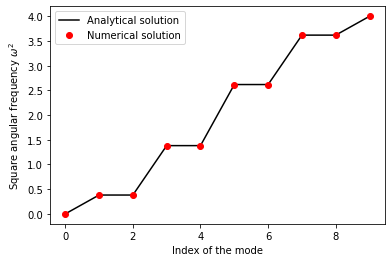

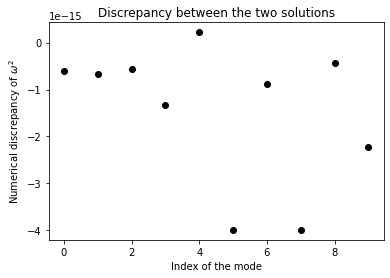

In [30]:
# Q3
w2_th = np.sort(4*k/m*np.sin(np.arange(N)*np.pi/N)**2)
plt.plot(e_val, '-k', label='Analytical solution')
plt.plot(w2_th, 'or', label='Numerical solution')
plt.xlabel("Index of the mode")
plt.ylabel("Square angular frequency $\omega^2$")
plt.legend()
plt.show()

plt.plot(e_val-w2_th, 'ok')
plt.xlabel("Index of the mode")
plt.ylabel("Numerical discrepancy of $\omega^2$")
plt.title("Discrepancy between the two solutions")
plt.show()

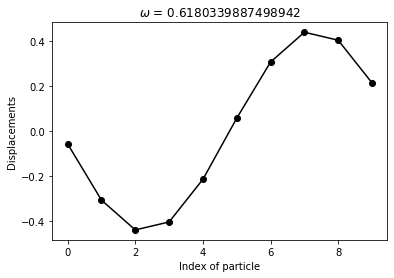

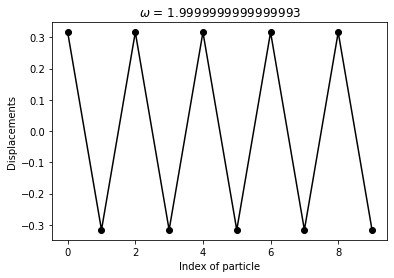

In [31]:
# Q4
for i in [1, N-1]:
    plt.plot(e_vec[:, i], 'o-k')
    plt.title("$\omega$ = "+str(np.sqrt(e_val[i])))
    plt.xlabel("Index of particle")
    plt.ylabel("Displacements")
    plt.show()

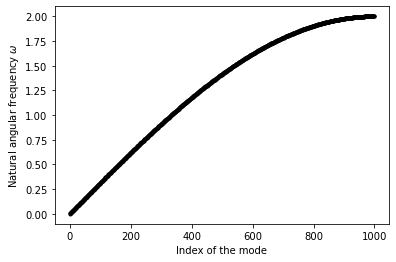

In [13]:
# Q5

N, k, m = 1000, 1, 1

Q = k/m*(2*np.eye(N) - np.eye(N, k=-1) - np.eye(N, k=1))
Q[N-1, 0] = -k/m
Q[0, N-1] = -k/m

e_val, e_vec = np.linalg.eigh(Q)
order = np.argsort(e_val)
e_val = e_val[order]
e_val[e_val < 0] = 0

plt.plot(np.sqrt(e_val), '.k')
plt.xlabel("Index of the mode")
plt.ylabel("Natural angular frequency $\omega$")
plt.show()

In [14]:
# Q6

Q_sp = k/m*(2*sps.eye(N) - sps.eye(N, k=-1) - sps.eye(N, k=1))
Q_sp[N-1, 0] = -k/m
Q_sp[0, N-1] = -k/m

print("Execution time of the *NumPy* eigenvalue solver:")
%timeit np.linalg.eig(Q)
print("Execution time of the *NumPy* eigenvalue solver for real symmetric matrices:")
%timeit np.linalg.eigh(Q)
print("Execution time of the *SciPy* eigenvalue solver for sparse real symmetric matrices:")
%timeit eigsh(Q_sp, k=10, return_eigenvectors=True, sigma=4.)


/home/mottierr/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Execution time of the *NumPy* eigenvalue solver:
2.37 s ± 87.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Execution time of the *NumPy* eigenvalue solver for real symmetric matrices:
271 ms ± 35.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Execution time of the *SciPy* eigenvalue solver for sparse real symmetric matrices:
14.2 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Q7.

The dynamics now reads, with $\xi_i(t) = \mathrm{Re} \left(X e^{i\omega t} \right)$,
\begin{align}
\frac{k}{m} (X_1 - 2X_0 + X_{N-1})+ \omega^2 X_0 &= 0\\
\frac{k}{m} (X_{i+1} - 2X_i + X_{i-1})+  \omega^2 X_i &= -\frac{\delta_{i,500} F}{m}&i \in [1, N-2] \\
\frac{k}{m} (X_{0} - 2X_{N-1} + X_{N-2})+  \omega^2 X_{N-1} &=0
\end{align}
i.e., is of the form $Q'X = B$ with $ Q' = \omega^2 -Q$ and B such that B<sub>i</sub>=0 (i≠500 ) and B<sub>500</sub>=-F/m. 

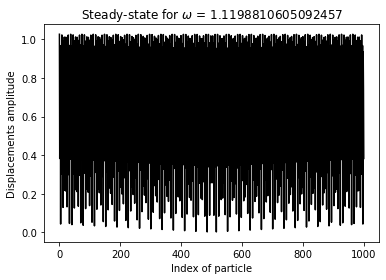

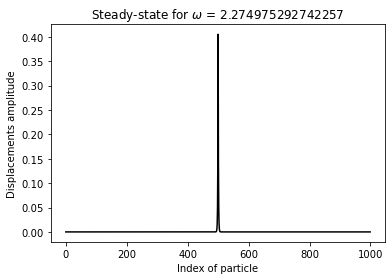

In [16]:
# Q8
F = 1
B = np.zeros(N)
B[500] = -F/m

for omega in [2*np.random.rand(), 2 + np.random.rand()]:

    Qp = -Q_sp+omega**2*sps.eye(N)
    X = linsolve.spsolve(Qp, B)

    plt.plot(np.abs(X), '-k')
    plt.xlabel("Index of particle")
    plt.ylabel("Displacements amplitude")
    plt.title("Steady-state for $\omega$ = "+str(omega))
    plt.show()

Q9

We add a linear friction force of the form $- \nu \dot{x}$ acting on all the particles. The steady-state now reads  $PX = B$ with $P = \omega^2 - Q + i \nu \omega/m$.

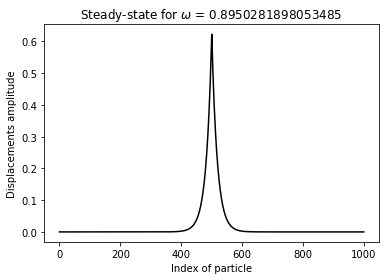

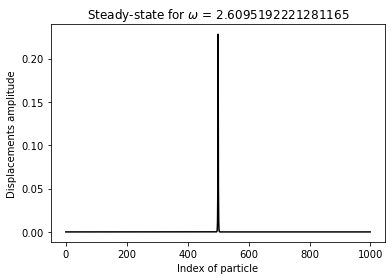

In [17]:
# Q9
F, nu = 1, .1
B = np.zeros(N)
B[500] = -F/m

for omega in [2*np.random.rand(), 2 + np.random.rand()]:

    P = -Q_sp+(1.j*omega*nu/m+omega**2)*sps.eye(N)
    X = linsolve.spsolve(P, B)
    plt.plot(np.abs(X), '-k')
    plt.xlabel("Index of particle")
    plt.ylabel("Displacements amplitude")
    plt.title("Steady-state for $\omega$ = "+str(omega))
    plt.show()